In [1]:
import sys
sys.path.append("..")
from SPI.SPI_openeo import *

Authenticated using refresh token.
https://openeocloud.vito.be/openeo/1.0.0/ time: 2024-04-10 06:11:08.710947


In [2]:
dc = SPI_dc
dc = dc.filter_temporal(["2022-01-01", "2022-03-01"])
# out_format = "NetCDF"
out_format = "GTiff"
dc = dc.save_result(format=out_format)
output_path = custom_execute_batch(dc, job_options=heavy_job_options, out_format=out_format)

output_dir=/home/emile/openeo/ANIN-drought-indices/SPI/out-2024-04-10_06_11_08.710947
/home/emile/openeo/ANIN-drought-indices/SPI/out-2024-04-10_06_11_08.710947/
0:00:00 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': send 'start'
0:00:59 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': queued (progress N/A)
0:01:26 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': queued (progress N/A)
0:01:48 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': queued (progress N/A)
0:02:13 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': queued (progress N/A)
0:02:37 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': queued (progress N/A)
0:02:57 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': running (progress N/A)
0:03:45 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': running (progress N/A)
0:04:27 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': running (progress N/A)
0:05:32 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': running (progress N/A)
0:06:10 Job 'vito-j-2404100f431b497ca042fe8fe4d5abd9': running (progress 

In [3]:
import rasterio
files = glob.glob(str(output_path / "*.tif"))
datasets = list(map(lambda x: rasterio.open(x), files))
datasets

[<open DatasetReader name='/home/emile/openeo/ANIN-drought-indices/SPI/out-2024-04-10_06_11_08.710947/openEO_2022-01-01Z.tif' mode='r'>,
 <open DatasetReader name='/home/emile/openeo/ANIN-drought-indices/SPI/out-2024-04-10_06_11_08.710947/openEO_2022-02-01Z.tif' mode='r'>,
 <open DatasetReader name='/home/emile/openeo/ANIN-drought-indices/SPI/out-2024-04-10_06_11_08.710947/openEO_2022-03-01Z.tif' mode='r'>]

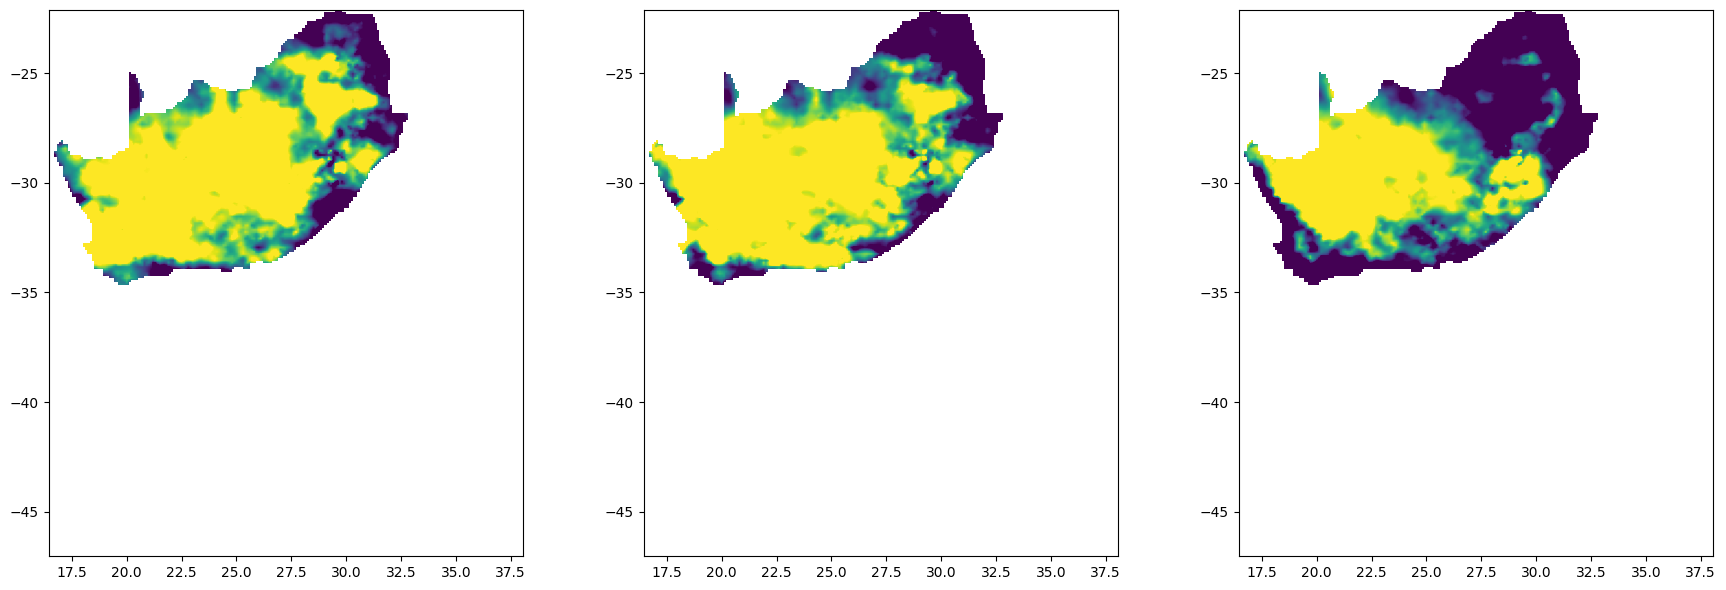

In [4]:
import matplotlib.pyplot as plt
from rasterio.plot import show

f, axarr = plt.subplots(1, 3, dpi=100, figsize=(18, 6))
im = show(datasets[0].read(1), vmin=0, vmax=1, transform=datasets[0].transform, ax=axarr[0])

im = show(datasets[1].read(1), vmin=0, vmax=1, transform=datasets[1].transform, ax=axarr[1])

im = show(datasets[2].read(1), vmin=0, vmax=1, transform=datasets[2].transform, ax=axarr[2])
plt.tight_layout()